<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 3. Математика для data sciense. Нетология.

1) Решить систему линейных уравнений:

![alt text](https://italiandirectory.eu/wp-content/ql-cache/quicklatex.com-34a5602e13176cbddcfd35cca34478fe_l3.svg)

In [25]:
import numpy as np

In [26]:
# метод 1 - с применением numpy linalg solve
a = np.array([[2,1,1], [1,3,2], [1,0,0]])
b = np.array([4,5,6])
x = np.linalg.solve(a, b)
x

array([  6.,  15., -23.])

In [27]:
#Проверим, перемножив матрицу коэффициентов а на полученный корень x 
#и сравнив его со значением вектора св. коэффициентов b
np.allclose(a.dot(x),b)

True

In [28]:
# метод 2 - с применением обратной матрицы x = a^-1 * b
a_inv = np.linalg.inv(a)
x = a_inv.dot(b)
x

array([  6.,  15., -23.])

2) Анна выбирает тарифный план для телефонной связи. Первый план, T1, стоит 20 долларов в месяц, каждый звонок стоит 25 центов в минуту. Второй тарифный план, T2, стоит 40долларов в месяц, но звонки стоят 8 центов в минуту. Какой план ей выбрать, если Анна звонит не более 117 минут в месяц?

Составим задачу в системе линейных уравнений. 

Количество минут - независимая переменная, будет нашим x. Стоимость тарифа - зависимая величина, будет нашим y. 

Написать систему уравнений для данной задачи, построить график, найти точку пересечения прямых. 
Сделать вывод о том, какой тариф использовать лучше для Анны.

$$0.25 * m + 20 = y$$

$$0.08 * m + 40 = y$$

В таком случае пара (m0,y0) - это кол-во минут m0, при которой некая сумма тарифа y0 сравняется при использовании любого тарифа.

$$0.25 * m - y = -20$$

$$0.08 * m - y = -40$$

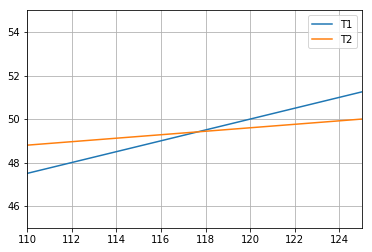

In [29]:
import matplotlib.pyplot as plt
m = np.arange(0, 200)
t1 = 0.25*m + 20
t2 = 0.08*m + 40

plt.figure()
plt.plot(m, t1)
plt.plot(m, t2)
plt.xlim(110, 125)
plt.ylim(45, 55)
plt.grid()
plt.legend(['T1','T2'])
plt.show()

По графику не совсем понятно кол-во минут m0, но : 117 < m0 < 118.
    
По графику видно, что при m <= 117, тариф Т1 выгоднее для Анны.

На всякий случай проверю себя в точных цифрах, решив систему:

In [30]:
a = np.array([[0.25,-1], [0.08,-1]])
b = np.array([-20, -40])
x = np.linalg.solve(a, b)
x

array([117.64705882,  49.41176471])

Получается, что решение подтвердилось.

3) Загрузить датасет Boston houses. 
Выбрать 3-хмерное пространство (3 атрибута из таблицы), взять 3 дома по данному трехмерному пространству, доказать, что данные векторы не компланарны.

In [31]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data)
boston_df_3 = boston_df[[7, 8, 9]]
boston_df_3.columns = ["DIS", "RAD", "TAX"]
boston_df_3.head()

,DIS,RAD,TAX
0,4.0900,1.0,296.0
1,4.9671,2.0,242.0
2,4.9671,2.0,242.0
3,6.0622,3.0,222.0
4,6.0622,3.0,222.0


In [32]:
home_matrix = np.array([boston_df_3.loc[0].tolist(), boston_df_3.loc[1].tolist(), boston_df_3.loc[3].tolist()])
home_matrix

array([[  4.09  ,   1.    , 296.    ],
       [  4.9671,   2.    , 242.    ],
       [  6.0622,   3.    , 222.    ]])

In [33]:
np.linalg.det(home_matrix)

32.93860000000034

Определитель != 0, следовательно вектора не коллинеарны

4) Для матрицы, полученной на предыдущей задачи, посчитать собственный вектор(v). Умножить собственный вектор на матрицу (Av). Сделать график. Во сколько раз Av отличается от v?

In [34]:
e_vals, e_vecs = LA.eig(home_matrix)
print("Собственные вектора:\n", e_vecs)

Собственные вектора:
 [[-0.66211971 -0.9291264   0.60344611]
 [-0.54872223 -0.36856855 -0.79738339]
 [-0.51039338  0.02968771 -0.00570225]]


In [35]:
e_vecs.dot(home_matrix)

array([[  -3.66492234,   -0.71003418, -286.87098618],
       [  -8.90888837,   -3.67800951, -428.63448265],
       [  -1.97461524,   -0.46812469, -145.1579122 ]])

5) Задание повышенного уровня. - не решила, так и не поняла, как вычислить коэффициенты полученной квадратичной функции (переписку в слак видела, но не поняла, как это сделать)

Как посчитать интеграл полинома, полученного в домашнем задании №2, при полиномиальной регрессии?

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
price = boston_dataset.target
  
x = boston.LSTAT

x = np.array(x).reshape(-1, 1)
y = price

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(x) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression()
model = lin2.fit(X_poly, y)

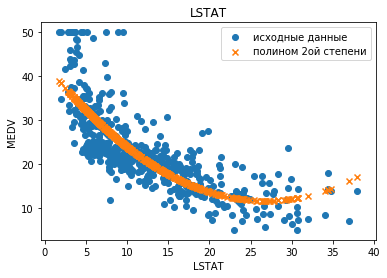

In [37]:
y_pred = model.predict(poly.fit_transform(x))
plt.scatter(x, y, marker='o')
plt.scatter(x, y_pred, marker='x')
plt.title('LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(['исходные данные', 'полином 2ой степени'])
plt.show()